### Análise Exploratória dos Dados da Associação Passos Mágicos


Passos Mágicos é uma associação que atua trabalhando na transformação da vida de crianças e jovens de baixa renda os levando a melhores oportunidades de vida, que inclui: educação de qualidade, auxílio psicológico/psicopedagógico, ampliação de sua visão de mundo e protagonismo. 

Para o projeto do Curso de Pós Graduação de Engenharia de Machine Learning da FIAP, Tech Challenger 5, fomos desafiados a desenvolver um modelo capaz de estimar o risco de defasagem escolar de cada estudante nos anos 2022, 2023 e 2024.

Os dados estão disponíveis nesse [link](https://docs.google.com/spreadsheets/d/1td91KoeSgXrUrCVOUkLmONG9Go3LVcXpcNEw_XrL2R0/edit?gid=555005642#gid=555005642).

O dicionário de dados está disponível [aqui](https://drive.google.com/file/d/1Z8Rs6SLicxMJUu_zwrYD399mPvs-djVb/view).

Outros materiais disponíveis [aqui](https://drive.google.com/drive/folders/1Z1j6uzzCOgjB2a6i3Ym1pmJRsasfm7cD).

Para conhecer mais o projeto: [https://passosmagicos.org.br/](https://passosmagicos.org.br/)

### Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import unidecode
from IPython.display import display, HTML

### Carregamento dos dados

In [ ]:
# Dados de 2022
df_2022 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2022')

In [3]:
df_2022.columns

Index(['RA', 'Fase', 'Turma', 'Nome', 'Ano nasc', 'Idade 22', 'Gênero',
       'Ano ingresso', 'Instituição de ensino', 'Pedra 20', 'Pedra 21',
       'Pedra 22', 'INDE 22', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'Rec Psicologia', 'IDA',
       'Matem', 'Portug', 'Inglês', 'Indicado', 'Atingiu PV', 'IPV', 'IAN',
       'Fase ideal', 'Defas', 'Destaque IEG', 'Destaque IDA', 'Destaque IPV'],
      dtype='object')

In [ ]:
# Dados de 2023
df_2023 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2023')

In [6]:
df_2023.columns

Index(['RA', 'Fase', 'INDE 2023', 'Pedra 2023', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'IPP', 'Rec Psicologia',
       'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV', 'IPV', 'IAN',
       'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Destaque IPV.1'],
      dtype='object')

In [ ]:
# Dados de 2024
df_2024 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2024')

In [7]:
df_2024.columns

Index(['RA', 'Fase', 'INDE 2024', 'Pedra 2024', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Avaliador4',
       'Avaliador5', 'Avaliador6', 'IAA', 'IEG', 'IPS', 'IPP',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV',
       'IPV', 'IAN', 'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Escola', 'Ativo/ Inativo', 'Ativo/ Inativo.1'],
      dtype='object')

### Análises

- Quantos alunos tem em cada arquivo (2022, 2023, 2024)? R: 860, 1014, 1156
- Há registros duplicados no mesmo arquivo? R: Não
- É possível identificar histórico de um aluno? R: Sim
- Quais as características dos alunos que não estão no ano seguinte?
- Todos os arquivos possuem as mesmas colunas? R: Não

- Quantos alunos sairam de 2022 para 2023? Análise por gênero, fase, defasagem.
- Quantos alunos novos em 2023? Análise por gênero, fase, defasagem.
- Houve mudança de defasagem em algum aluno? Para melhor ou para pior?

#### Quantos alunos tem em cada arquivo?

In [8]:
print(f"2022: {df_2022.shape[0]}")
print(f"2023: {df_2023.shape[0]}")
print(f"2024: {df_2024.shape[0]}")

2022: 860
2023: 1014
2024: 1156


#### Há registros duplicados no mesmo ano considerando o Nome Anonimizado?

In [9]:
duplicados = df_2022[df_2022.duplicated(subset=['Nome'], keep=False)]

print(duplicados.to_string())

Empty DataFrame
Columns: [RA, Fase, Turma, Nome, Ano nasc, Idade 22, Gênero, Ano ingresso, Instituição de ensino, Pedra 20, Pedra 21, Pedra 22, INDE 22, Cg, Cf, Ct, Nº Av, Avaliador1, Rec Av1, Avaliador2, Rec Av2, Avaliador3, Rec Av3, Avaliador4, Rec Av4, IAA, IEG, IPS, Rec Psicologia, IDA, Matem, Portug, Inglês, Indicado, Atingiu PV, IPV, IAN, Fase ideal, Defas, Destaque IEG, Destaque IDA, Destaque IPV]
Index: []


In [10]:
duplicados = df_2023[df_2023.duplicated(subset=['Nome Anonimizado'], keep=False)]

print(duplicados.to_string())

Empty DataFrame
Columns: [RA, Fase, INDE 2023, Pedra 2023, Turma, Nome Anonimizado, Data de Nasc, Idade, Gênero, Ano ingresso, Instituição de ensino, Pedra 20, Pedra 21, Pedra 22, Pedra 23, INDE 22, INDE 23, Cg, Cf, Ct, Nº Av, Avaliador1, Rec Av1, Avaliador2, Rec Av2, Avaliador3, Rec Av3, Avaliador4, Rec Av4, IAA, IEG, IPS, IPP, Rec Psicologia, IDA, Mat, Por, Ing, Indicado, Atingiu PV, IPV, IAN, Fase Ideal, Defasagem, Destaque IEG, Destaque IDA, Destaque IPV, Destaque IPV.1]
Index: []


In [11]:
duplicados = df_2024[df_2024.duplicated(subset=['Nome Anonimizado'], keep=False)]

print(duplicados.to_string())

Empty DataFrame
Columns: [RA, Fase, INDE 2024, Pedra 2024, Turma, Nome Anonimizado, Data de Nasc, Idade, Gênero, Ano ingresso, Instituição de ensino, Pedra 20, Pedra 21, Pedra 22, Pedra 23, INDE 22, INDE 23, Cg, Cf, Ct, Nº Av, Avaliador1, Rec Av1, Avaliador2, Rec Av2, Avaliador3, Avaliador4, Avaliador5, Avaliador6, IAA, IEG, IPS, IPP, Rec Psicologia, IDA, Mat, Por, Ing, Indicado, Atingiu PV, IPV, IAN, Fase Ideal, Defasagem, Destaque IEG, Destaque IDA, Destaque IPV, Escola, Ativo/ Inativo, Ativo/ Inativo.1]
Index: []


#### É possível identificar histórico de um aluno pelo "Nome Anonimizado"?

In [12]:
# Extrai os valores únicos de cada coluna de interesse
nomes_df1 = set(df_2022['Nome'])
nomes_df2 = set(df_2023['Nome Anonimizado'])
nomes_df3 = set(df_2024['Nome Anonimizado'])

# Interseções (elementos que existem em ambos os conjuntos comparados)
comuns_1_e_2 = nomes_df1.intersection(nomes_df2)
comuns_1_e_3 = nomes_df1.intersection(nomes_df3)
comuns_2_e_3 = nomes_df2.intersection(nomes_df3)

# Exibição dos resultados
print(f"--- Relatório de Interseções ---")
print(f"Comuns entre DF1 e DF2 (Qtd: {len(comuns_1_e_2)})")
print(f"Comuns entre DF1 e DF3 (Qtd: {len(comuns_1_e_3)})")
print(f"Comuns entre DF2 e DF3 (Qtd: {len(comuns_2_e_3)})")

## Se quiser imprimir a lista de nomes nas interseções
# print(f"Comuns entre DF1 e DF2 (Qtd: {len(comuns_1_e_2)}): {comuns_1_e_2}")
# print(f"Comuns entre DF1 e DF3 (Qtd: {len(comuns_1_e_3)}): {comuns_1_e_3}")
# print(f"Comuns entre DF2 e DF3 (Qtd: {len(comuns_2_e_3)}): {comuns_2_e_3}")


--- Relatório de Interseções ---
Comuns entre DF1 e DF2 (Qtd: 600)
Comuns entre DF1 e DF3 (Qtd: 472)
Comuns entre DF2 e DF3 (Qtd: 765)


#### Todos os arquivos possuem as mesmas colunas?

In [13]:

lista_dfs = [df_2022, df_2023, df_2024]
names_dfs = ['2022', '2023', '2024']

# Identificar todas as colunas únicas presentes no universo dos 3 dataframes
all_cols = sorted(list(set().union(*(df.columns for df in lista_dfs))))

dados_relatorio = []

# Verificar a presença de cada coluna
for col in all_cols:
    # Cria uma lista com os nomes dos DFs onde a coluna existe
    is_in = [names_dfs[i] for i, df in enumerate(lista_dfs) if col in df.columns]
    
    qtd = len(is_in)
    
    # Filtrar: Queremos colunas presentes em 1 ou 2 DFs (ou seja, excluir se for 3)
    if 1 <= qtd < 3:
        dados_relatorio.append({
            'Coluna': col,
            'Onde está presente': ', '.join(is_in),
            'Qtd Dataframes': qtd
        })

# Criar o DataFrame final para visualização
df_resultado = pd.DataFrame(dados_relatorio)

# Exibição
print("Relatório de Colunas (Presentes em apenas 1 ou 2 DataFrames):")
display(HTML(df_resultado.to_html()))


Relatório de Colunas (Presentes em apenas 1 ou 2 DataFrames):


,Coluna,Onde está presente,Qtd Dataframes
0,Ano nasc,2022,1
1,Ativo/ Inativo,2024,1
2,Ativo/ Inativo.1,2024,1
3,Avaliador5,2024,1
4,Avaliador6,2024,1
5,Data de Nasc,"2023, 2024",2
6,Defas,2022,1
7,Defasagem,"2023, 2024",2
8,Destaque IPV.1,2023,1
9,Escola,2024,1


#### Análise dos dados de 2023

#### Padronização do nome dos campos

- Renomear o campo RA para registro_unico
- Renomear o campo Fase para nome_fase
- Renomear o campo Turma para nome_turma
- Renomear o campo Nome Anonimizado para nome_anonimizado
- Renomear o campo Idade para num_idade
- Renomear o campo Gênero para nome_genero
- Renomear o campo Ano ingresso para num_ano_ingresso
- Renomear o campo Instituição de ensino para instituicao_ensino
- Renomear Pedra 20, Pedra 21, Pedra 22, Pedra 2023 para class_pedra_20, class_pedra_21, class_pedra_22, class_pedra_23
- Renomear o campo INDE 2023 para ind_desenv_educ_22
- Renomear o campo Cg para class_aluno_geral
- Renomear o campo Cf para class_aluno_fase
- Renomear o campo Ct para class_aluno_turma 
- Renomear o campo Nº Av para num_avaliacao
- Renomear o campo Avaliador1 para nome_avaliador_1
- Renomear o campo Rec Av1 para observ_avaliador_1
- Renomear o campo Avaliador2 para nome_avaliador_2
- Renomear o campo Rec Av2 para observ_avaliador_2
- Renomear o campo Avaliador3 para nome_avaliador_3
- Renomear o campo Rec Av3 para observ_avaliador_3
- Renomear o campo Avaliador4 para nome_avaliador_4
- Renomear o campo Rec Av4 para observ_avaliador_4
- Renomear o campo IAA para indic_auto_avaliacao
- Renomear o campo IEG para indic_engajamento
- Renomear o campo IPS para indic_psicossocial
- Renomear o campo Rec Psicologia para observ_psico
- Renomear o campo IDA para indic_aprendizagem
- Renomear o campo Mat para nota_media_matematica
- Renomear o campo Por para nota_media_portugues
- Renomear o campo Ing para nota_media_infles
- Renomear o campo Indicado para flag_indicado_bolsa
- Renomear o campo Atingiu PV para flag_ating_ponto_virada
- Renomear o campo IPV para nota_media_ponto_virada
- Renomear o campo IAN para nota_media_adequacao
- Renomear o campo Fase Ideal para nome_fase_ideal
- Renomear o campo Defasagem para qtd_desafagem
- Renomear o campo Destaque IEG para observ_engajamento
- Renomear o campo Destaque IDA para observ_aprendizagem
- Renomear o campo Destaque IPV para observ_ponto_virada

In [7]:
with pd.option_context('display.max_columns', None):
    display(df_2023.head(1))

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,NaN,NaN,8.92,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [9]:
def rename_cols(df: pd.DataFrame, rename_dict:dict) -> pd.DataFrame:

    return df.rename(columns=rename_dict)

In [8]:
rename_dict_2023 = {
        "RA": "registro_unico",
        "Fase": "nome_fase",
        "Turma": "nome_turma",
        "Data de Nasc": "num_ano_nascimento",
        "Nome Anonimizado": "nome_anonimizado",
        "Idade": "num_idade",
        "Gênero": "nome_genero",
        "Ano ingresso": "num_ano_ingresso",
        "Instituição de ensino": "instituicao_ensino",
        "Pedra 20": "class_pedra_20",
        "Pedra 21": "class_pedra_21",
        "Pedra 22": "class_pedra_22",
        "INDE 22": "indic_desenv_educ_22",  # padronizado com prefixo indic_
        "Pedra 2023": "class_pedra_23",
        "INDE 2023": "indic_desenv_educ_23",  # padronizado com prefixo indic_
        "Cg": "class_geral",
        "Cf": "class_fase",
        "Ct": "class_turma",
        "Nº Av": "num_avaliacao",
        "Avaliador1": "nome_avaliador_1",
        "Rec Av1": "observ_avaliador_1",
        "Avaliador2": "nome_avaliador_2",
        "Rec Av2": "observ_avaliador_2",
        "Avaliador3": "nome_avaliador_3",
        "Rec Av3": "observ_avaliador_3",
        "Avaliador4": "nome_avaliador_4",
        "Rec Av4": "observ_avaliador_4",
        "IAA": "indic_auto_avaliacao",
        "IEG": "indic_engajamento",
        "IPS": "indic_psicossocial",
        "Rec Psicologia": "observ_psico",
        "IDA": "indic_aprendizagem",
        "Mat": "nota_media_matematica",
        "Por": "nota_media_portugues",
        "Ing": "nota_media_ingles",  # corrigido
        "Indicado": "flag_indicado_bolsa",
        "Atingiu PV": "flag_atingiu_ponto_virada",  # flag em vez de indic_
        "IPV": "nota_media_ponto_virada",
        "IAN": "nota_media_adequacao",
        "Fase Ideal": "fase_nome_ideal",
        "Defasagem": "qtd_defasagem",  # quantidade padronizada
        "Destaque IEG": "observ_engajamento",
        "Destaque IDA": "observ_aprendizagem",
        "Destaque IPV": "observ_ponto_virada"
    }

In [10]:
df_2023_cleaned = rename_cols(df_2023, rename_dict_2023)
with pd.option_context('display.max_columns', None):
    display(df_2023_cleaned.head(3))

,registro_unico,nome_fase,indic_desenv_educ_23,class_pedra_23,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,Pedra 23,indic_desenv_educ_22,INDE 23,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,IPP,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,8.14,7.5000,NaN,8.9,8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
2,RA-863,ALFA,5.92975,Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,3.14,5.9375,NaN,6.3,7.0,5.5,NaN,NaN,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


#### Transformações na base de 2023

- Transformar os novos campos class_pedra_20, class_pedra_21, class_pedra_22 em one-hot-encode, considerando
 os seguintes valores possíveis na ordem crescente: Quartzo, Ágata, Ametista, Topázio 
- Criar indicador de mudança de pedra: se houve diferença entre class_pedra_20, class_pedra_21 marcar -1 ou 1 indicando que a houve queda ou subiu de categoria, o mesmo para o campo class_pedra_22
- Padronizar os valores do campo genero 1 - Masculino e 2 - Feminino
- Calcular a idade de ingresso no Passos Mágicos
- Fase de ingresso no Passos Mágicos
- Instituição de ensino pública ou particular, criar o campo is_escola_publica e se no nome da escola tiver Pública e suas variações marcar 1, caso contrário, 0
- Criar campo flag_indicado_bolsa considerando se tem algum dos seguintes valores:
    - Privada - Programa de Apadrinhamento     
    - Privada *Parcerias com Bolsa 100%        
    - Privada - Pagamento por *Empresa Parceira
    - Privada - Programa de apadrinhamento    
- Criar uma categoria que a ordem importa com o campo observ_avaliador_
- Extrair melhor e pior observação dos 4 avaliadores
- Incluir o "valor não avaliado" para Nan nos campos observ_avaliador_
- Dos campos de observação (observ_engajamento	observ_aprendizagem	observ_ponto_virada) extrair se é Destaque ou Melhorar
- Criar campo que marca os registros que possue um dos valores na avaliação psicologia: Requer avaliação e Não indicado
- Criação dos campos defasagem_negativa (aluno atrasado) e defasagem_positiva (aluno adiantado)

- Equalizar domínio do campo Nome da Fase com valores: 0, 1, 2, 3, 4, 5, 6, 7.
    - Alfa = 0
- Padronizar o num_ano_nascimento para aaaa-mm-dd
- Remover as colunas totalmente Nulas: quais são? 
- Remover os Campos Pedra 23 e INDE 23 estão completamente nulos
- Criar visualização de dados histórica que mostra alunos mudando de Pedra em cada ano e saindo 
- É possível preencher os dados de 2023 com os de 2024??
- Calcular a idade baseada na data de nascimento
- Como está o campo de instituição de ensino? Como entender cada um dos valores?
- Por que tem aluno sem nota de inglês?
- O campo indicado é se recebeu bolsa ou não, podemos extrair essa informação do campo de Instituição de Ensino

In [11]:
def plot_hist(df:pd.DataFrame, col_name: str, title: str="Distribuição", rotation_degree: int=45):
    # Etapa 1: Contar a frequência de cada categoria
    distribuicao = df[col_name].value_counts()

    print("Distribuição de Frequência:")
    print(distribuicao)

    # Etapa 2: Plotar a distribuição
    plt.figure(figsize=(10, 6)) # Define o tamanho da figura
    distribuicao.plot(kind='bar', color='skyblue', edgecolor='black')

    # Adicionando títulos e rótulos para clareza
    plt.title(title, fontsize=16)
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=rotation_degree) # Rotaciona os rótulos do eixo X para melhor leitura
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta o plot para evitar que os rótulos se sobreponham
    plt.show()

In [13]:
df_2023_cleaned["num_idade"].unique()

array([8, 9, 7, datetime.datetime(1900, 1, 8, 0, 0),
       datetime.datetime(1900, 1, 7, 0, 0), 10,
       datetime.datetime(1900, 1, 11, 0, 0),
       datetime.datetime(1900, 1, 9, 0, 0),
       datetime.datetime(1900, 1, 10, 0, 0), 12, 11,
       datetime.datetime(1900, 1, 14, 0, 0),
       datetime.datetime(1900, 1, 13, 0, 0),
       datetime.datetime(1900, 1, 12, 0, 0), 13, 14,
       datetime.datetime(1900, 1, 15, 0, 0), 15, 16,
       datetime.datetime(1900, 1, 17, 0, 0),
       datetime.datetime(1900, 1, 16, 0, 0), 17, 18,
       datetime.datetime(1900, 1, 19, 0, 0),
       datetime.datetime(1900, 1, 18, 0, 0), 19, 22,
       datetime.datetime(1900, 1, 20, 0, 0), 21,
       datetime.datetime(1900, 1, 21, 0, 0), 20,
       datetime.datetime(1900, 1, 26, 0, 0), 23, 24], dtype=object)

Distribuição de Frequência:
nome_fase
ALFA      231
FASE 2    200
FASE 1    173
FASE 3    132
FASE 4     94
FASE 5     65
FASE 8     63
FASE 6     33
FASE 7     23
Name: count, dtype: int64


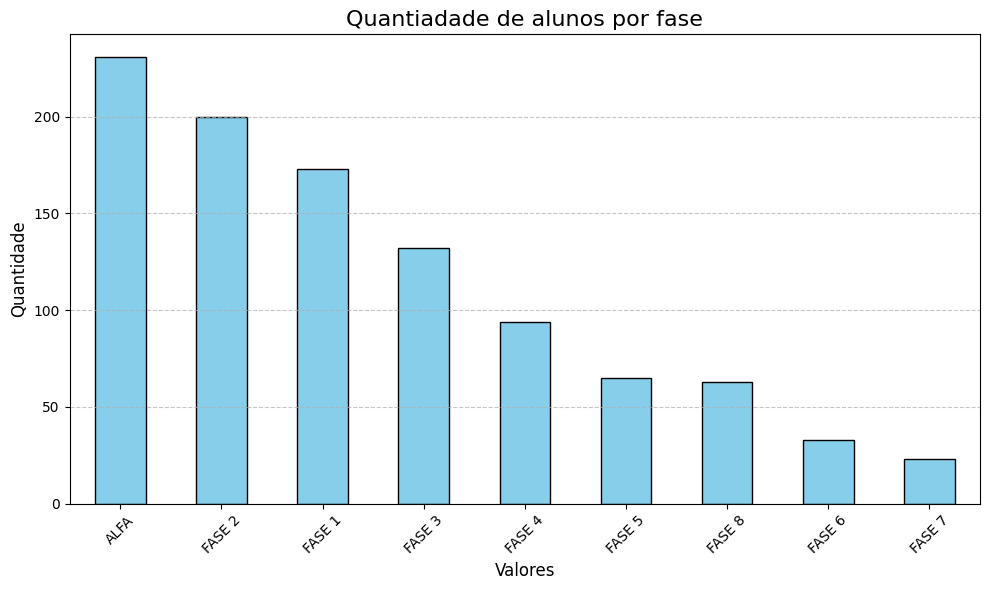

In [14]:
# Quantidade de alunos por fase
plot_hist(df_2023_cleaned, "nome_fase", "Quantiadade de alunos por fase")

Distribuição de Frequência:
instituicao_ensino
Pública                                      809
Privada - Programa de Apadrinhamento          99
Privada *Parcerias com Bolsa 100%             60
Privada                                       28
Privada - Pagamento por *Empresa Parceira      8
Concluiu o 3º EM                               7
Nenhuma das opções acima                       2
Privada - Programa de apadrinhamento           1
Name: count, dtype: int64


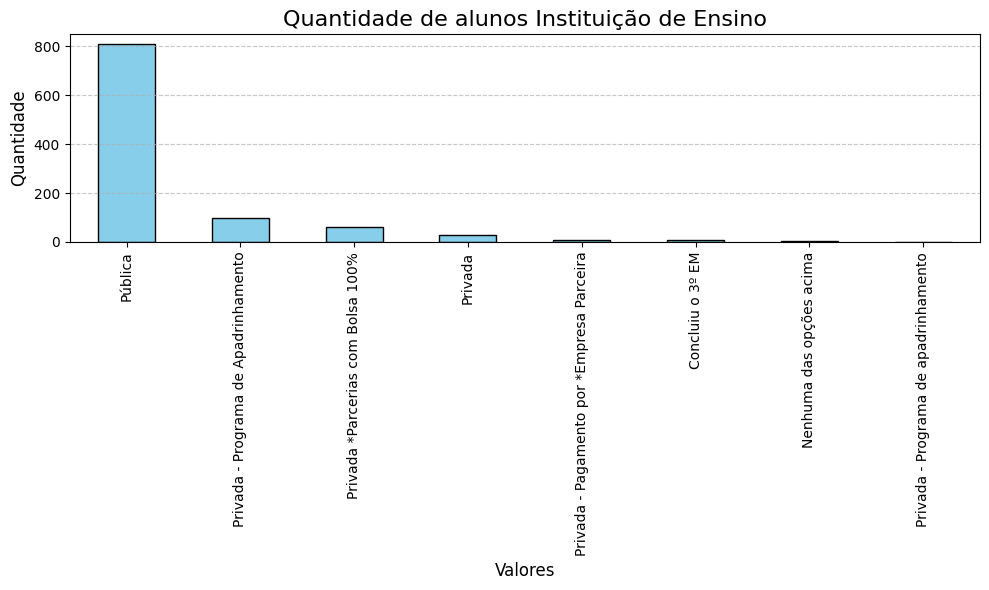

In [15]:
# Quantidade de alunos por fase
plot_hist(df_2023_cleaned, "instituicao_ensino", "Quantidade de alunos Instituição de Ensino", 90)

In [16]:
def feat_eng_class_pedra(df: pd.DataFrame) -> pd.DataFrame:
    categorias_pedra = ["quartzo", "agata", "ametista", "topazio"]

    for col in ["class_pedra_20", "class_pedra_21", "class_pedra_22", "class_pedra_23"]:
        # Normaliza os valores da coluna para minúsculo e sem acento
        df[col] = df[col].apply(
            lambda x: unidecode.unidecode(str(x)).lower() if pd.notna(x) else np.nan
        )

        # Define como categoria ordenada
        df[col] = pd.Categorical(df[col], categories=categorias_pedra, ordered=True)

        # One-hot encoding com dtype float (aceita NaN)
        one_hot = pd.get_dummies(df[col], prefix=col).astype(float)

        # Onde o valor original era NaN, mantém NaN nas colunas dummy
        one_hot[df[col].isna()] = np.nan

        # Concatena ao dataframe
        df = pd.concat([df, one_hot], axis=1)

    return df


df_2023_final = feat_eng_class_pedra(df_2023_cleaned)
with pd.option_context('display.max_columns', None):
    display(df_2023_final.head(3))

,registro_unico,nome_fase,indic_desenv_educ_23,class_pedra_23,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,Pedra 23,indic_desenv_educ_22,INDE 23,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,IPP,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada,Destaque IPV.1,class_pedra_20_quartzo,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_topazio,class_pedra_21_quartzo,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_topazio,class_pedra_22_quartzo,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_topazio,class_pedra_23_quartzo,class_pedra_23_agata,class_pedra_23_ametista,class_pedra_23_topazio
0,RA-861,ALFA,9.31095,topazio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
1,RA-862,ALFA,8.22120,topazio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,8.14,7.5000,NaN,8.9,8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2,RA-863,ALFA,5.92975,quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,3.14,5.9375,NaN,6.3,7.0,5.5,NaN,NaN,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0


In [18]:
df_2023_final.loc[
    df_2023_final["nome_anonimizado"] == "Aluno-750",
    ["class_pedra_20", "class_pedra_21", "class_pedra_22","class_pedra_20_agata", "class_pedra_21_agata", "class_pedra_22_agata"]
]

,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_20_agata,class_pedra_21_agata,class_pedra_22_agata
209,agata,agata,agata,1.0,1.0,1.0


In [19]:
# Verificando que a transformação foi realizada corretamente, marcando 1 e 0
df_2023_final.loc[
    df_2023_final["nome_anonimizado"] == "Aluno-805",
    ["class_pedra_20", "class_pedra_21", "class_pedra_22", "class_pedra_23", "class_pedra_20_quartzo",
     "class_pedra_20_agata","class_pedra_20_ametista","class_pedra_20_topazio","class_pedra_21_quartzo",
     "class_pedra_21_agata","class_pedra_21_ametista","class_pedra_21_topazio","class_pedra_22_quartzo",
     "class_pedra_22_agata","class_pedra_22_ametista","class_pedra_22_topazio","class_pedra_23_quartzo",
     "class_pedra_23_agata","class_pedra_23_ametista","class_pedra_23_topazio"]
]

,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_23,class_pedra_20_quartzo,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_topazio,class_pedra_21_quartzo,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_topazio,class_pedra_22_quartzo,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_topazio,class_pedra_23_quartzo,class_pedra_23_agata,class_pedra_23_ametista,class_pedra_23_topazio
164,NaN,ametista,topazio,agata,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [20]:
# --- 2. Indicador de mudança de Pedra ---
def feat_eng_calc_change_pedra(df: pd.DataFrame, categorias_pedra: list[str]) -> pd.DataFrame:

    def calc_diff(a, b):
        if pd.isna(a) or pd.isna(b):
            return np.nan
        idx_a, idx_b = categorias_pedra.index(a), categorias_pedra.index(b)
        return 1 if idx_b > idx_a else -1 if idx_b < idx_a else 0

    df["mudanca_pedra_21"] = df.apply(lambda x: calc_diff(x["class_pedra_20"], x["class_pedra_21"]), axis=1)
    df["mudanca_pedra_22"] = df.apply(lambda x: calc_diff(x["class_pedra_21"], x["class_pedra_22"]), axis=1)
    df["mudanca_pedra_23"] = df.apply(lambda x: calc_diff(x["class_pedra_22"], x["class_pedra_23"]), axis=1)

    return df

categorias_pedra = ["quartzo", "agata", "ametista", "topazio"]
df_2023_final = feat_eng_calc_change_pedra(df_2023_final, categorias_pedra)

with pd.option_context('display.max_columns', None):
    mask = df_2023_final[["class_pedra_20", "class_pedra_21", "class_pedra_22", "class_pedra_23"]].notna().all(axis=1)
    df_mask = df_2023_final[mask]
    display(df_mask[["class_pedra_20", "class_pedra_21", "class_pedra_22", "class_pedra_23", "mudanca_pedra_21", "mudanca_pedra_22", "mudanca_pedra_23"]].head(3))

,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_23,mudanca_pedra_21,mudanca_pedra_22,mudanca_pedra_23
209,agata,agata,agata,quartzo,0.0,0.0,-1.0
251,ametista,ametista,ametista,agata,0.0,0.0,-1.0
257,agata,ametista,agata,ametista,1.0,-1.0,1.0


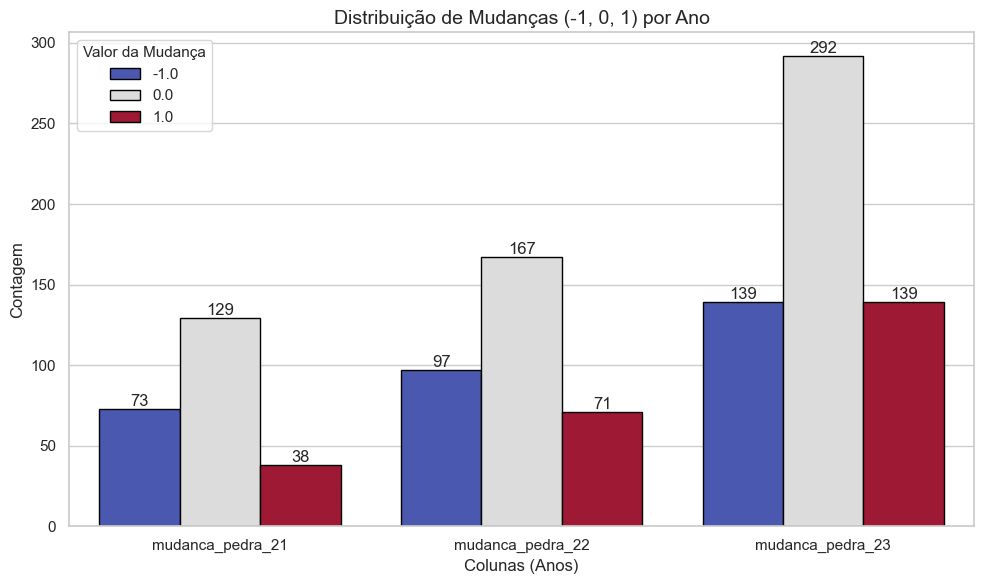

In [21]:
# 1. Criação de dados fictícios para exemplo

df = df_2023_final

# 2. Preparação dos Dados (Transformação para formato Longo)
# O Seaborn trabalha melhor com dados "tidy" (uma coluna para categorias, uma para valores)
cols_interesse = ['mudanca_pedra_21', 'mudanca_pedra_22', 'mudanca_pedra_23']

df_long = df[cols_interesse].melt(
    var_name='Ano',      # Nome da nova coluna que conterá os nomes das colunas originais
    value_name='Valor'   # Nome da nova coluna que conterá -1, 0 ou 1
)

# 3. Configuração do Gráfico
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Criação do Countplot (Gráfico de contagem)
# x='Ano': As colunas (21, 22, 23) ficarão no eixo X
# hue='Valor': As barras serão coloridas/divididas pelos valores (-1, 0, 1)
ax = sns.countplot(
    data=df_long, 
    x='Ano', 
    hue='Valor', 
    palette='coolwarm', # Palette divergente é boa para negativo/neutro/positivo
    edgecolor='black'
)

# 4. Customização e Rótulos
plt.title('Distribuição de Mudanças (-1, 0, 1) por Ano', fontsize=14)
plt.xlabel('Colunas (Anos)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Valor da Mudança', title_fontsize='11')

# Adicionar os números acima das barras para facilitar leitura
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


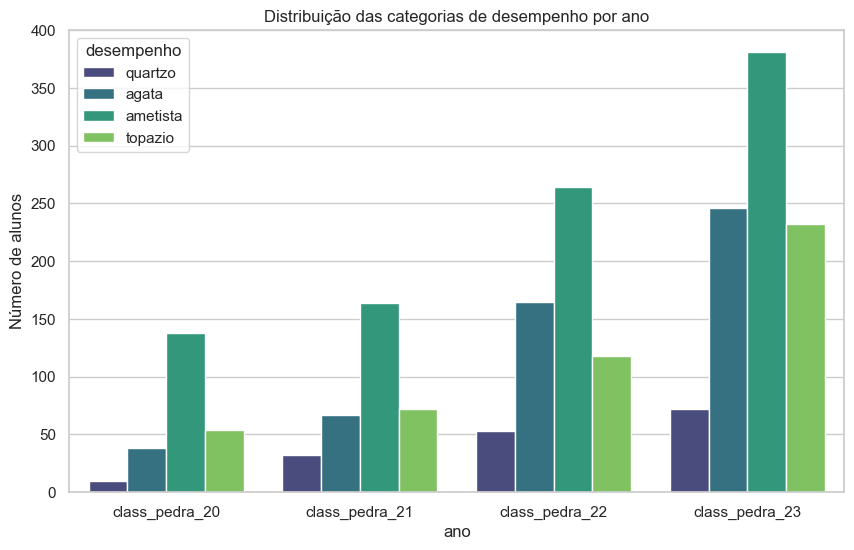

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: suponha que você tenha estas colunas
cols = ["class_pedra_20", "class_pedra_21", "class_pedra_22", "class_pedra_23"]

# Transforma em formato longo
df_long = df_2023_final.melt(
    id_vars=["registro_unico"],  # ou outra coluna identificadora
    value_vars=cols,
    var_name="ano",
    value_name="desempenho"
)

# Gráfico de barras: distribuição de categorias por ano
plt.figure(figsize=(10,6))
sns.countplot(data=df_long, x="ano", hue="desempenho", palette="viridis")
plt.title("Distribuição das categorias de desempenho por ano")
plt.ylabel("Número de alunos")
plt.show()

In [23]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Assumindo que df_2023_final já está carregado
df = df_2023_final.copy()

# 1. Configuração
# ---------------------------------------------------------
colunas_historico = ["class_pedra_20", "class_pedra_21", "class_pedra_22", "class_pedra_23"]
colunas_historico.sort() # Garante a ordem temporal das colunas

# Ordem vertical desejada
categorias_ordenadas = ["Evasão","quartzo", "agata", "ametista", "topazio"]

cores_map = {
    "Evasão": "#A9A9A9", "quartzo": "#1f77b4", "agata": "#ff7f0e", "ametista": "#2ca02c",
    "topazio": "#d62728"
}

# 2. Tratamento de Dados
# ---------------------------------------------------------
for col in colunas_historico:
    df[col] = df[col].astype(str).replace('nan', np.nan)
    df[col] = df[col].fillna('Evasão')
    # Garante que strings vazias ou 'None' virem Evasão
    df[col] = df[col].replace(['None', '', 'nan'], 'Evasão')

# 3. Definição das Posições X baseadas no Sufixo (A Lógica Solicitada)
# ---------------------------------------------------------
# Extrai os sufixos únicos (ex: '20', '21', '22', '23')
sufixos_unicos = [col.split('_')[-1] for col in colunas_historico]
num_anos = len(sufixos_unicos)

# Cria um dicionário que mapeia o sufixo EXATO para a posição X EXATA
# Ex: {'20': 0.001, '21': 0.333, '22': 0.666, '23': 0.999}
posicoes_x_por_sufixo = {}
for i, sufixo in enumerate(sufixos_unicos):
    pos = i / (num_anos - 1) if num_anos > 1 else 0.5
    # Ajuste de borda
    if pos == 0: pos = 0.001
    if pos == 1: pos = 0.999
    posicoes_x_por_sufixo[sufixo] = pos



In [25]:
# 4. Criação dos Nós (Labels e Coordenadas)
# ---------------------------------------------------------
labels = []
node_colors = []
node_x = []
node_y = []
mapa_labels = {} 

counter = 0
num_cats = len(categorias_ordenadas)

# Iteramos pelas colunas (anos) e depois pelas categorias
for col in colunas_historico:
    sufixo_atual = col.split('_')[-1] # Pega '20', '21', etc.
    
    # Recupera a posição X baseada ESTRITAMENTE no sufixo
    x_base = posicoes_x_por_sufixo[sufixo_atual]
    
    for j, cat in enumerate(categorias_ordenadas):
        label_key = f"{cat}_{sufixo_atual}"
        labels.append(label_key)
        node_colors.append(cores_map.get(cat, "black"))
        
        # --- LÓGICA DE POSIÇÃO X ---
        # Usa a posição definida pelo sufixo.
        # Não adicionamos offsets condicionais grandes que possam jogar para outro ano.
        node_x.append(x_base)
        
        # --- LÓGICA DE POSIÇÃO Y ---
        # Distribui de 0 (topo) a 1 (fundo)
        if num_cats > 1:
            y_pos = j / (num_cats - 1) 
            # Margem de segurança de 1% em cima e embaixo para não cortar
            y_pos = 0.01 + (y_pos * 0.98)
        else:
            y_pos = 0.5
            
        node_y.append(y_pos)
        
        mapa_labels[label_key] = counter
        counter += 1
        
        #print(f"{mapa_labels[label_key]} - label_key: {label_key} x_base: {x_base} y_pos: {y_pos}")


In [26]:
# 5. Criação dos Links (Fluxos)
# ---------------------------------------------------------
sources = []
targets = []
values = []

for i in range(len(colunas_historico) - 1):
    col_origem = colunas_historico[i]
    col_destino = colunas_historico[i+1]
    
    suffix_origem = col_origem.split('_')[-1]
    suffix_destino = col_destino.split('_')[-1]
    
    fluxo = df.groupby([col_origem, col_destino]).size().reset_index(name='contagem')
    
    for _, row in fluxo.iterrows():
        cat_origem = row[col_origem]
        cat_destino = row[col_destino]
        
        # Monta as chaves
        key_origem = f"{cat_origem}_{suffix_origem}"
        key_destino = f"{cat_destino}_{suffix_destino}"
        
        if key_origem in mapa_labels and key_destino in mapa_labels:
            sources.append(mapa_labels[key_origem])
            targets.append(mapa_labels[key_destino])
            values.append(row['contagem'])

In [27]:

# 6. Plotagem
# ---------------------------------------------------------
fig = go.Figure(data=[go.Sankey(
    arrangement="snap", # Importante para respeitar as coordenadas manuais
    node=dict(
      pad=20,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color=node_colors,
      x=node_x, # Coordenadas X forçadas pelo sufixo
      y=node_y  # Coordenadas Y forçadas pela ordem da lista
    ),
    link=dict(
      source=sources,
      target=targets,
      value=values
  ))])

fig.update_layout(
    title_text="Fluxo de Alunos (Alinhamento Estrito por Sufixo)",
    font_size=10,
    height=600
)
fig.show()

In [28]:
# --- 3. Padronizar campo gênero ---
df_2023_final["cod_genero"] = df_2023_final["nome_genero"].map({"Masculino": 0, "Feminino": 1})

with pd.option_context('display.max_columns', None):
    display(df_2023_final[["cod_genero", "nome_genero"]].head())

,cod_genero,nome_genero
0,1,Feminino
1,0,Masculino
2,0,Masculino
3,1,Feminino
4,0,Masculino


In [29]:
# --- 12. Padronizar nascimento ---
df_2023_final["num_ano_nascimento"] = pd.to_datetime(df_2023_final["num_ano_nascimento"], errors="coerce")
df_2023_final["num_ano_ingresso"] = df_2023_final["num_ano_ingresso"].astype(int)

 # --- 4. Idade de ingresso na Passos Mágicos ---
def calc_idade(row):
    if pd.isna(row["num_ano_nascimento"]) or pd.isna(row["num_ano_ingresso"]):
        return np.nan
    anos = row["num_ano_ingresso"] - row["num_ano_nascimento"].year
    return anos

df_2023_final["num_idade_ingresso_pm"] = df_2023_final.apply(calc_idade, axis=1)

with pd.option_context('display.max_columns', None):
    display(df_2023_final[["num_idade_ingresso_pm", "num_ano_ingresso", "num_ano_nascimento"]].head())

,num_idade_ingresso_pm,num_ano_ingresso,num_ano_nascimento
0,8,2023,2015-06-17
1,9,2023,2014-05-31
2,7,2023,2016-02-25
3,8,2023,2015-12-03
4,9,2023,2014-11-13


In [31]:
# --- 5. Fase de ingresso ---
fase_map = {
    "ALFA": 0,
    "FASE 1": 1,
    "FASE 2": 2,
    "FASE 3": 3,
    "FASE 4": 4,
    "FASE 5": 5,
    "FASE 6": 6,
    "FASE 7": 7,
    "FASE 8": 8
}
df_2023_final["fase_ingresso"] = df_2023_final["nome_fase"].map(fase_map)


df_2023_final["fase_ingresso"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [32]:
# --- 6. Escola pública ou particular ---
df_2023_final["is_escola_publica"] = df_2023_final["instituicao_ensino"].str.contains("Pública", case=False, na=False).astype(int)

df_grouped = (
    df_2023_final
    .groupby(["is_escola_publica", "instituicao_ensino"])
    .size()
    .reset_index(name="count")
)

print(df_grouped)

   is_escola_publica                         instituicao_ensino  count
0                  0                           Concluiu o 3º EM      7
1                  0                   Nenhuma das opções acima      2
2                  0                                    Privada     28
3                  0          Privada *Parcerias com Bolsa 100%     60
4                  0  Privada - Pagamento por *Empresa Parceira      8
5                  0       Privada - Programa de Apadrinhamento     99
6                  0       Privada - Programa de apadrinhamento      1
7                  1                                    Pública    809


In [34]:
# --- 7. Flag indicado bolsa ---
bolsas = [
    "Privada - Programa de Apadrinhamento",
    "Privada *Parcerias com Bolsa 100%",
    "Privada - Pagamento por *Empresa Parceira",
    "Privada - Programa de apadrinhamento"
]
df_2023_final["flag_indicado_bolsa"] = df_2023_final["instituicao_ensino"].isin(bolsas).astype(int)


df_grouped = (
    df_2023_final
    .groupby(["instituicao_ensino", "flag_indicado_bolsa"])
    .size()
    .reset_index(name="count")
)

print(df_grouped)

                          instituicao_ensino  flag_indicado_bolsa  count
0                           Concluiu o 3º EM                    0      7
1                   Nenhuma das opções acima                    0      2
2                                    Privada                    0     28
3          Privada *Parcerias com Bolsa 100%                    1     60
4  Privada - Pagamento por *Empresa Parceira                    1      8
5       Privada - Programa de Apadrinhamento                    1     99
6       Privada - Programa de apadrinhamento                    1      1
7                                    Pública                    0    809


In [35]:
# --- 8. Observações avaliadores ---
obs_cols = [c for c in df_2023_final.columns if c.startswith("observ_avaliador_")]
print(obs_cols)

['observ_avaliador_1', 'observ_avaliador_2', 'observ_avaliador_3', 'observ_avaliador_4']


In [36]:
valores_distintos = df_2023_final[obs_cols].stack().unique()
print(valores_distintos)

[]


In [37]:
# Melhor e pior observação (exemplo simples: ordem alfabética)
df_2023_final["melhor_obs"] = df_2023_final[obs_cols].apply(lambda x: max(x), axis=1)
df_2023_final["pior_obs"] = df_2023_final[obs_cols].apply(lambda x: min(x), axis=1)

In [38]:
valores_distintos = df_2023_final[["melhor_obs","pior_obs"]].stack().unique()
print(valores_distintos)

[]


In [39]:
# --- 9. Observações engajamento/aprendizagem/ponto de virada ---	
for col in ["observ_engajamento", "observ_aprendizagem", "observ_ponto_virada"]:
    df_2023_final[col + "_flag"] = df_2023_final[col].apply(lambda v: "Destaque" if "Destaque" in str(v) else "Melhorar" if "Melhorar" in str(v) else np.nan)

valores_distintos = df_2023_final[["observ_engajamento_flag", "observ_aprendizagem_flag", "observ_ponto_virada_flag"]].stack().unique()
print(valores_distintos)

[]


In [40]:
# --- 11. Defasagem negativa/positiva ---
df_2023_final["defasagem_negativa"] = (df_2023_final["qtd_defasagem"] < 0).astype(int)
df_2023_final["defasagem_positiva"] = (df_2023_final["qtd_defasagem"] > 0).astype(int)

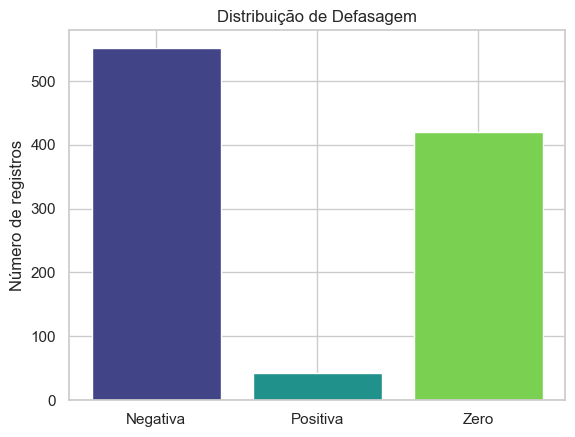

In [41]:
counts = {
    "Negativa": df_2023_final["defasagem_negativa"].sum(),
    "Positiva": df_2023_final["defasagem_positiva"].sum(),
    "Zero": (df_2023_final["qtd_defasagem"] == 0).sum()
}

# Seleciona três cores distintas da paleta viridis
colors = cm.viridis([0.2, 0.5, 0.8])

plt.bar(counts.keys(), counts.values(), color=colors)
plt.title("Distribuição de Defasagem")
plt.ylabel("Número de registros")
plt.show()

In [42]:
with pd.option_context('display.max_columns', None):
    display(df_2023_final.head(3))


,registro_unico,nome_fase,indic_desenv_educ_23,class_pedra_23,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,Pedra 23,indic_desenv_educ_22,INDE 23,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,IPP,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada,Destaque IPV.1,class_pedra_20_quartzo,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_topazio,class_pedra_21_quartzo,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_topazio,class_pedra_22_quartzo,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_topazio,class_pedra_23_quartzo,class_pedra_23_agata,class_pedra_23_ametista,class_pedra_23_topazio,mudanca_pedra_21,mudanca_pedra_22,mudanca_pedra_23,cod_genero,num_idade_ingresso_pm,fase_ingresso,is_escola_publica,melhor_obs,pior_obs,observ_engajamento_flag,observ_aprendizagem_flag,observ_ponto_virada_flag,defasagem_negativa,defasagem_positiva
0,RA-861,ALFA,9.31095,topazio,ALFA A - G0/G1,Aluno-861,2015-06-17,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,0,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1,8,0,1,NaN,NaN,NaN,NaN,NaN,0,0
1,RA-862,ALFA,8.22120,topazio,ALFA A - G0/G1,Aluno-862,2014-05-31,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,8.14,7.5000,NaN,8.9,8.5,9.2,NaN,0,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0,9,0,1,NaN,NaN,NaN,NaN,NaN,1,0
2,RA-863,ALFA,5.92975,quartzo,ALFA A - G0/G1,Aluno-863,2016-02-25,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,0.0,7.6,3.14,5.9375,NaN,6.3,7.0,5.5,NaN,0,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0,7,0,1,NaN,NaN,NaN,NaN,NaN,0,0


In [44]:
df_2023_cleaned["num_ano_nascimento"].unique()

array(['6/17/2015', '5/31/2014', '2/25/2016',
       datetime.datetime(2015, 12, 3, 0, 0), '11/13/2014',
       datetime.datetime(2016, 10, 2, 0, 0), '6/29/2015',
       datetime.datetime(2015, 8, 11, 0, 0), '1/15/2015', '10/20/2014',
       '6/21/2014', '5/27/2013', datetime.datetime(2012, 1, 3, 0, 0),
       '11/17/2013', '4/26/2014', datetime.datetime(2015, 11, 4, 0, 0),
       '6/24/2014', '7/22/2013', datetime.datetime(2014, 5, 3, 0, 0),
       '11/29/2015', '4/23/2015', '6/15/2015',
       datetime.datetime(2015, 11, 2, 0, 0),
       datetime.datetime(2015, 2, 12, 0, 0), '10/30/2015',
       datetime.datetime(2016, 5, 1, 0, 0), '10/16/2015',
       datetime.datetime(2016, 11, 4, 0, 0),
       datetime.datetime(2015, 7, 7, 0, 0), '2/26/2015',
       datetime.datetime(2014, 3, 10, 0, 0), '1/16/2015', '11/21/2013',
       datetime.datetime(2014, 5, 10, 0, 0), '4/14/2014',
       datetime.datetime(2013, 1, 9, 0, 0), '5/27/2015', '12/24/2015',
       datetime.datetime(2015, 3, 4, 0, 0